In [2]:
#Movies_Rating_prediction
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset with specified encoding
df = pd.read_csv('E:/Internship/IMDb Movies India.csv', encoding='latin1')

In [4]:
# Display the first few rows of the dataset
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
# Basic data analysis
print("Dataset shape:", df.shape)
print("Dataset info:")
df.info()
print("Dataset description:")
print(df.describe())

Dataset shape: (15509, 10)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14979 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13631 non-null  object 
 4   Rating    7918 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  14983 non-null  object 
 7   Actor 1   13891 non-null  object 
 8   Actor 2   13123 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
Dataset description:
               Year       Rating
count  14979.000000  7918.000000
mean   -1987.012217     5.842902
std       25.418375     1.384811
min    -2022.000000     1.100000
25%    -2009.000000     4.900000
50%    -1991.000000     6.000000
75%    -1968.000000     6.800000
max    -1913.000000    14.000000


In [6]:
# Handle missing values
# Convert 'Votes' to numeric, forcing errors to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [7]:
# Fill missing numerical values with the mean (for simplicity)
df['Year'].fillna(df['Year'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14928\1540020334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14928\1540020334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
# Drop rows with missing categorical values (for simplicity)
df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [9]:
# Convert 'Duration' to numerical by extracting numbers
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [10]:
# Fill the remaining missing values in 'Duration' with mean
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14928\601265830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].mean(), inplace=True)


In [11]:
# Encode categorical features
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

In [12]:
# Feature selection
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']
X = df[features]
y = df['Rating']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the ratings on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.2161634834268418
R-squared: 0.04226598441097085


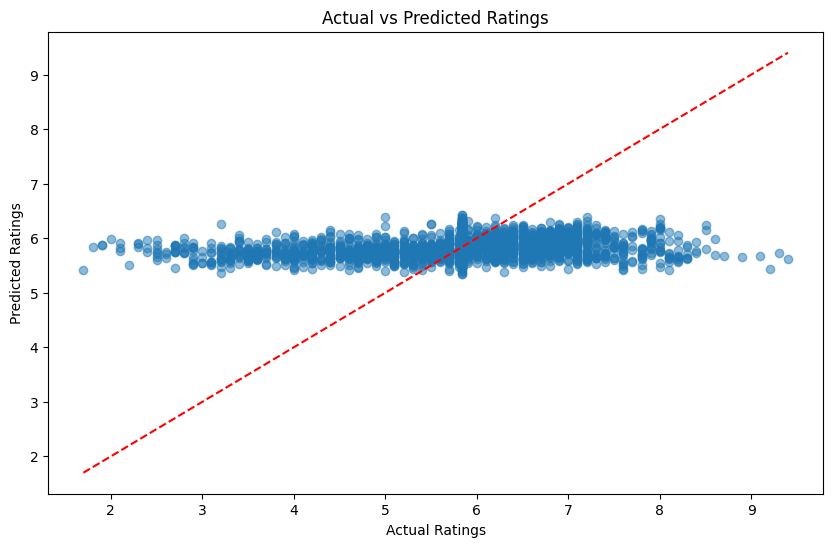

In [18]:
# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()